# Intermediate NumPy

This week we are going to continue learning about **NumPy**, manipulating 2D NumPy arrays and have a brief introduction to plotting.  There is also a *debug* challenge and a '*self learning*' challenge at the end of the lab.

>The lab assumes you are using the `hds_code` conda virtual environment.
>> You should have complete the **Intermediate NumPy** lecture in the series before attempting this lab.

---

## Generating a random array

There is a numpy function designed to generate arrays with random numbers. These are very useful for some applications, for example when we want to test how an algorithm would behave in an uncertain situation. As usual, before using Numpy, we need to import it:

In [1]:
import numpy as np

Now, we can generate a 4x4 matrix with random integer numbers between 0 and 99:

In [2]:
A = np.random.randint(0, 100,(4,4))

Note that the `100` is not included, but `0` is. To find about these things, it's always good to check the numpy help, which says that the second parameter is _exclusive_:

In [3]:
help(np.random.randint)

Help on built-in function randint:

randint(...) method of numpy.random.mtrand.RandomState instance
    randint(low, high=None, size=None, dtype=int)
    
    Return random integers from `low` (inclusive) to `high` (exclusive).
    
    Return random integers from the "discrete uniform" distribution of
    the specified dtype in the "half-open" interval [`low`, `high`). If
    `high` is None (the default), then results are from [0, `low`).
    
    .. note::
        New code should use the ``integers`` method of a ``default_rng()``
        instance instead; please see the :ref:`random-quick-start`.
    
    Parameters
    ----------
    low : int or array-like of ints
        Lowest (signed) integers to be drawn from the distribution (unless
        ``high=None``, in which case this parameter is one above the
        *highest* such integer).
    high : int or array-like of ints, optional
        If provided, one above the largest (signed) integer to be drawn
        from the distributi

## Finding the minimum value of an array

Numpy provides many functions to investigate and manipulate the contents of an array. 
One of the most common is to find its minimum or maximum values. This can be done with `np.min` and `np.max`:

In [4]:
a_min = np.min(A)
print('The minimum value of A is {0}'.format(a_min))

The minimum value of A is 13


In [5]:
# Tip: The format function can work with the numpy formula directly:
print('The maximum value of A is {0}'.format(np.max(A)))

The maximum value of A is 94


Sometimes it is important to know where the minimum (or maximum) value is located, rather than its value.
In maths, this is called argmin. It turns out that Numpy has a function for this, called `np.argmin`:


In [6]:
a_min_loc = np.argmin(A)
print('The minimum value of A is {0}, and it is located at {1}'.format(a_min, a_min_loc))

The minimum value of A is 13, and it is located at 14


Surprisingly, `a_min_loc` has taken a single value rather than two indices. 
In this situation, we should turn to the help of the function and see why that was:

In [7]:
help(np.argmin)

Help on function argmin in module numpy:

argmin(a, axis=None, out=None)
    Returns the indices of the minimum values along an axis.
    
    Parameters
    ----------
    a : array_like
        Input array.
    axis : int, optional
        By default, the index is into the flattened array, otherwise
        along the specified axis.
    out : array, optional
        If provided, the result will be inserted into this array. It should
        be of the appropriate shape and dtype.
    
    Returns
    -------
    index_array : ndarray of ints
        Array of indices into the array. It has the same shape as `a.shape`
        with the dimension along `axis` removed.
    
    See Also
    --------
    ndarray.argmin, argmax
    amin : The minimum value along a given axis.
    unravel_index : Convert a flat index into an index tuple.
    take_along_axis : Apply ``np.expand_dims(index_array, axis)``
                      from argmin to an array as if by calling min.
    
    Notes
    ----

It says that what it has returned is the index of the `flattened` array. 
That means that it is the index without considering the shape. 
However, in the `See also` section, it mentions another function, `unravel_index` which can 
convert this _flattened_ index to an array of indices. At the bottom of the help, there is an example for this.

If we use it, we obtain the expected result:

In [8]:
a_min_indices = np.unravel_index(a_min_loc, A.shape)
print('The minimum value of A is {0}, and it is located at {1}'.format(a_min, a_min_indices))

The minimum value of A is 13, and it is located at (3, 2)


__Tip:__ We can use this index to access the element directly:

In [9]:
A[a_min_indices]

13

## Plotting an array as an image

Images are made of pixels, and each pixel is, in esence a number. That means we can plot any matrix as an image. 
We can do that with a function from `matplotlib.pyplot` called `imshow`. First, we need to import the module, which is normally called `plt`

In [10]:
import matplotlib.pyplot as plt


Now, we are ready to plot the array `A`

[[43 51 50 32]
 [69 91 94 27]
 [61 92 39 59]
 [67 36 13 77]]


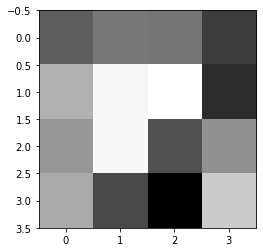

In [11]:
print(A)
plt.imshow(A, cmap='gray')

You can see that the smaller values get a darker colour, and the largest a lighter colour. 
This is because we are using the colourmap `'gray'`. 
There are many colourmaps you can use, for reference you can check 
<a href=https://matplotlib.org/examples/color/colormaps_reference.html >this link</a> to see them.

If no colourmap is specified, the default is used:

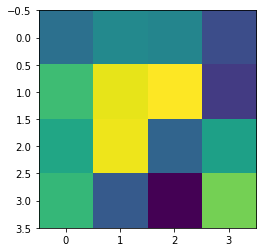

In [12]:
plt.imshow(A)

## Exercise 1: Heat map

Create a *function* called `heatmap_of_minima(trials, max_rand)` that takes as an argument an integer number `trials`. The purpose of the function is to plot a heatmap depicting how often the minimum of a random array is shown at each location, when generating `trial` random arrays.
Your function should performs the following tasks:

* Generates an array of zeros with size 10x10 called `record` (**Tip:** use `np.zeros` for this)
* Starts a loop for `trial` number of iterations, and in each iteration does the following:
    * Creates an array of size 10x10 with random integers between `0` and `max_rand - 1`
    * Finds the location of the minimum of this array
    * Adds 1 in this location in the `record` array
* Once the loop is finished, the function should plot the array `record` as an image

When your function is ready, call it with the following commands:
* `heatmap_of_minima(10000, 25)`
* `heatmap_of_minima(10000, 99999)`


What do you observe? Why do you think that happens?

## Exercise 2: Packing

In this exercise we are going to code an algorithm that places a few pieces inside a rectangular container without overlapping them. Both the container and the pieces are represented by matrices with `0`and `1` values and will be very simple (think of Tetris-style shapes). 

This is one example of a piece:

<table>
<tr>
    <td>0</td><td>1</td><td>0</td>
</tr>
<tr>
<td>1</td><td>1</td><td>1</td>
</tr>
</table>

Our algorithm is called _top-left-corner_ as all is trying to do is to place the pieces as close as possible to the top of the container (The top is represented by the `0` coordinate) and then at the left-most possible position (again, left-most is the `0` coordinate). In a nutshell, the code consists of the following steps:
* Read a list of pieces into Numpy arrays
* Loop over the all the pieces. In each iteration do:
    * Loop over the coordinate pairs of the container, starting from (0,0) and increasing first the x coordinate
    * For each pair of coordiantes, check if it would be possible to place the piece
    * If it is possible, place it and continue with the next piece
    * If a piece cannot be placed anywhere, record this information and continue
* Once all pieces are placed, plot the container with the pieces inside

To help you develop this quickly, we have created a template with some useful functions defined. It is on the file `ex2_quickstart.py`, that contains structure necessary to code the _top-left-corner_ algorithm.


**Task 1:** Open the file in Spyder 3. Once it is open, click "View", "Panes", "Outline". A panel like the one below should appear in Spyder.

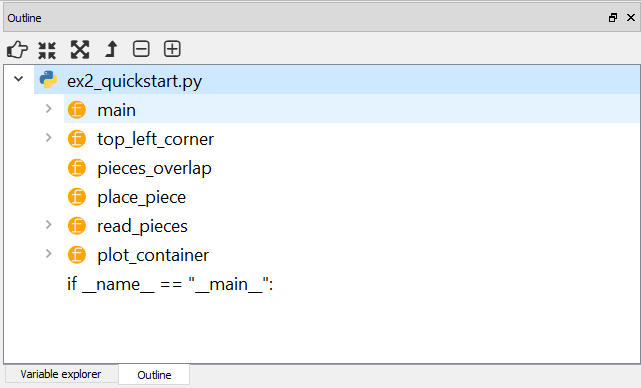

(If it does not, please try one more time. It is only visible when there is a checkmark next to "Outline")

This panel helps you navigate the code easily. It shows a list of all the functions that have been defined in the code. Click in `main`, so the editor will reveal where it starts.

The `main()` function, that is as follows:
```Python
def main():
    ''' Defines the main parameters and runs the algorithm
    '''

    directory = '../data/pieces'
    piece_names = ['p1.csv', 'p2.csv', 'p3.csv', 'p4.csv', 'p5.csv',
                   'p6.csv', 'p7.csv', 'p8.csv', 'p9.csv', 'p10.csv']

    container_width = 6
    container_height = 12

    piece_list = read_pieces(directory, piece_names)

    container, packed_pieces = top_left_corner(piece_list,
                                               container_width,
                                               container_height)
    # Show final packing
    plot_container(container)

    # See how many pieces could be packed:
    if packed_pieces < len(piece_list):
        print('WARNING: only {0} pieces were packed, out of {1}'.
              format(packed_pieces, len(piece_list)))
```

The `main()` starts of defining some paramerers. First, it defines a directory where the pieces are saved (**Tip:** to say that a file is in a directory "above" the current one, we use `..` as if it were a folder). It also contains the name of the pieces and the container width and height as parameters. You have been provided with functions that read the pieces and plot the container, so you do not need to worry about these. In fact, if you run the code, the following image should show up:

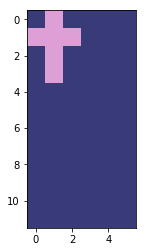

Note that (0,0) is the top left corner!


Here, you see that the first piece has been located at the top left corner, but nothing else happens. This is because there is an `if` statement in the `top_left_corner` function, preventing the algorithm from placing more than one piece:
```python
    for piece in piece_list:


        # Remove if statement!!!
        if (packed_pieces > 0):
            break
        ###
```


**Task 2:** Look for the above snipet in your code and remove the `if` statement. Run the code again. Now, all the pieces should be placed, but overlapping:

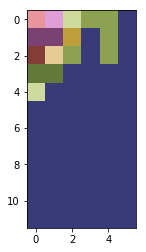

The function that deals with the overlap `pieces_overlap(container, piece, x_coord, y_coord)` is currently empty. It only returns `False`, meaning that the piece is in a valid position, no matter what the values of `container`, `piece` and `x_coord` and `y_coord` are.

In order to return `False`, the function should check three things:
1. The piece does not go over the width of the container (right side)
2. The piece does not go over the length of the container (bottom part)
3. The piece is not sitting on top of another one

Let's focus in part `1.`. In order to check the boundaries, the first thing we need to retrieve is what is the width and length of both the piece and the container. This can be done with the following code:

```python
    p_x, p_y = piece.shape
    c_x, c_y = container.shape
```

Now, let's check if the piece is "too much" to the right. The piece is going to be placed at `x_coord`, and it has a width of `p_x`; that means that the end of the piece will be at `x_coord + p_x`. Being "too much to the right" is equivalent to say that the end of the piece is somewhere over the right border of the container. The python statement that checks that is: 
```python
    if x_coord + p_x > c_x:
        return True
```
The statement to check the limits on the height is the same, but using `y` coordinates.

**Task 3:** Complete parts 1. and 2. of the function `pieces_overlap(container, piece, x_coord, y_coord)` as instructed above. Run the code again. It should run with no errors, but still show overlap.

Now that the boundaries are dealt with, we need to check overlap with previously placed pieces.
There are a few options to do this, some more efficient (fast to compute) than others. 
We will do this in a simple way, which is not necessarily the most efficient, 
but makes use of some Numpy functions that we have studied.

The idea is to check overlap in the following steps:
1. Save a matrix with the area of the container where the piece will be placed.
2. Add this matrix and the matrix of our piece.
3. Calculate the maximum of the sum.
4. If the maximum is greater than 2, there is overlap, otherwise there is not.

The idea behind this function is that the parts of the pieces are represented by ones; if adding the container and the piece stays below two, it means we have not "overlapped" any positions.

Let's see how this is coded. For Step 1 we need to use Numpy slices. We are interested in the slice that goes from `x_coord` to `x_coord + px` in the `x` axis and from `y_coord` to `y_coord + p_y` in the y axis.
```python
    container_bit = container[x_coord:x_coord + p_x, y_coord:y_coord + p_y]
```

Because the slice is a "window" to the original container, we do not want to modify its contents at the moment. To avoid this, we can perform Step 2 and Step 3 together:
```python
    max_value = np.max(container_bit + piece)
```

Finally, Step 4 is a simple `if` statement that returns `True` if `max_value` is over 2, and `False` otherwise.

**Task 4:** Complete parts the last part of the function `pieces_overlap(container, piece, x_coord, y_coord)` as instructed above. 
    Run the code again. It should now produce the following image:
    
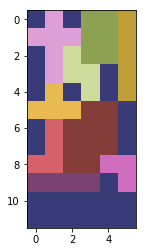

## Exercise 3: Bottom-right-corner:

Let's now modify the code from Exercise 2 to convert it to a _bottom-right-corner_ algorithm. 
This means that the pieces will be placed at the lowest, right-most possible position.
That means the highest coordinates in `(x,y)` first. To change this, you will have to modify the order in which positions are
tested in the `top_left_corner(piece_list, container_width, container_height)` function.

Remember that the `range` function works as follows:
```
range(start, stop[, step])
```

In [13]:
for i in range(20, 10, -1):
    print(i, end=' ')

20 19 18 17 16 15 14 13 12 11 

**Task:** Modify the `for` loops in the function `top_left_corner` in order to code the _bottom-right-corner_ algorithm.

The expected output is as follows:

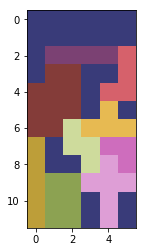

All done! Feel free to experiment with the order and quantity of the pieces, as well as container sizes and see what different outputs your algorithm can give. You might even create new pieces!

## Week 4: Self learning challenge

You might have noticed that running our algorithm for Exercises 2 and 3 prints a message on the screen:
```
WARNING: only 9 pieces were packed, out of 10
```

This means that the algorithm is not very good. 
One common approach to improve constructive packing algorithms is to pack the largest pieces first, 
as the smaller ones can find their way to the remaining gaps in the layout later on.

Your task consists in sorting (automatically)
the list of pieces by area (largest appears first), before the constructive algorithm runs.
There are many ways of doing this, so we are providing you some guidance.


The following steps might help you achieve this:
* It is not necessary to import any other module, Numpy is sufficient
* The area of a piece is equal to the number of elements in the matrix that take value `1`.
* You should have one function that takes a piece as an input and returns the area
* You should have one function that sorts the piece list: piece_list = sort_piece_list_by_area(piece_list)
* We recommend that you learn about the Numpy `argsort()` function and use it for this challenge.

Good luck!

## Week 4: Debug challenge

In the file `lab4_debug_challenge.py` we have given you a code that is supposed to do the following tasks:
* Read a list of pieces (as in Exercise 2)
* For each piece on the list, show them on screen in the following ways:
    * Original shape
    * Rotated to the right by 90 deg
    * Rotated to the right by 180 deg
    * Rotated to the right by 270 deg
 
 
 But it does not seem to be working at the moment! Can you make it work?

## Extra: Self learning challenge 2

Can you import the rotate function from the debug challenge file into the (completed) Exercise 2 file?

Once it is imported you will have access to the `rotate_right` function. Use it to randomly rotate some of the pieces and see how different are the results between runs.